Chris Lammers, Anthony Liscio, James Currie, Meghna Krishnan


# **Celebrity Attribute Categorization with Machine Learning**




This project's goal is to create a machine learning model that categorizes photos of celebrities based on 40 different attributes corresponding to facial features, facial expression, accessories, hair, and gender.  <br></br>
The attributes are:
- 5 o-Clock Shadow
- Arched Eyebrows
- Attractive
- Bags Under Eyes
- Bald
- Bangs
- Big Lips
- Big Nose
- Black Hair
- Blond Hair
- Blurry
- Brown Hair
- Bushy Eyebrows
- Chubby
- Double Chin
- Eyeglasses
- Goatee
- Gray Hair
- Heavy Makeup
- High Cheekbones
- Male
- Mouth Slightly Open
- Mustache
- Narrow Eyes
- No Beard
- Oval Face
- Pale Skin
- Pointy Nose
- Receding Hairline
- Rosy Cheeks
- Sideburns
- Smiling
- Straight Hair
- Wavy Hair
- Wearing Earrings
- Wearing Hat
- Wearing Lipstick
- Wearing Necklace
- Wearing Necktie
- Young

# **Dataset**

## Mounting to Google Drive to access the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

<br></br>
## Loading all images to all_images


In [ ]:
import os
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch

# path to the images
images_path = '/content/drive/MyDrive/MachineLearningFinalProject/CelebA-001/CelebA/Img/img_align_celeb'

# custom dataset class
class CustomImagesDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = sorted(os.listdir(root_dir))  # Sort the image paths

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.image_paths[idx])
        image = Image.open(img_name).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image

# transformation to preprocess the data (image size is 128x128)
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

# instance of CustomImageDataset
custom_img_dataset = CustomImagesDataset(root_dir=images_path, transform=transform)

# DataLoader for the dataset
batch_size = 32
data_loader = DataLoader(custom_img_dataset, batch_size=batch_size, shuffle=False)

# loading all images into a pytorch tensor.
# all_images[0] corresponds to 000001.jpg and so on
all_images = torch.cat([batch.squeeze() for batch in data_loader])

In [ ]:
all_images[0]

tensor([[[0.9922, 0.9922, 0.9922,  ..., 0.9922, 0.9804, 0.9961],
         [0.9922, 0.9922, 0.9922,  ..., 0.9961, 0.9882, 1.0000],
         [0.9922, 0.9922, 0.9922,  ..., 0.9804, 0.9922, 0.9961],
         ...,
         [0.6980, 0.6549, 0.5608,  ..., 0.3961, 0.3804, 0.3765],
         [0.5451, 0.5333, 0.6157,  ..., 0.4627, 0.4627, 0.4549],
         [0.6235, 0.7569, 0.8549,  ..., 0.4627, 0.4667, 0.4706]],

        [[0.9059, 0.9059, 0.9059,  ..., 0.9216, 0.9098, 0.9333],
         [0.9059, 0.9059, 0.9059,  ..., 0.9294, 0.9216, 0.9373],
         [0.9059, 0.9059, 0.9059,  ..., 0.9176, 0.9294, 0.9333],
         ...,
         [0.4392, 0.3922, 0.2980,  ..., 0.1451, 0.1333, 0.1294],
         [0.2824, 0.2706, 0.3412,  ..., 0.1961, 0.1961, 0.1961],
         [0.3569, 0.4902, 0.5804,  ..., 0.1922, 0.1922, 0.2000]],

        [[0.7608, 0.7608, 0.7608,  ..., 0.8353, 0.8588, 0.8706],
         [0.7608, 0.7608, 0.7608,  ..., 0.8431, 0.8706, 0.8745],
         [0.7608, 0.7608, 0.7608,  ..., 0.8353, 0.8745, 0.

## Loading in the attributes to all_attributes

In [ ]:
import os
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch

# attributes file path
attributes_file = '/content/drive/MyDrive/MachineLearningFinalProject/CelebA-001/CelebA/Anno/list_attr_celeba.txt'

# custom attribute dataset class
class CustomAttrDataset(Dataset):
    def __init__(self, root_dir, attributes_file, transform=None):
        self.root_dir = root_dir
        self.transform = transform

        # loading attributes from the attribute file
        with open(attributes_file, 'r') as file:
            lines = file.readlines()
            attribute_labels = lines[1].split()[1:]

            # skipping the first 2 lines since the first line is the number of
            # images, and the second line is the attribute names/labels
            lines = lines[2:]
            self.attributes = {line.split()[0]: list(map(int, line.split()[1:])) for line in lines}

        # loading and sorting image paths
        self.image_paths = sorted(os.listdir(root_dir))

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.image_paths[idx])
        image = Image.open(img_name).convert('RGB')

        if self.transform:
            image = self.transform(image)

        # get the attributes for the current image (-1 or 1)
        attributes = torch.tensor(self.attributes[self.image_paths[idx]])

        return image, attributes


# instance of the custom attribute dataset
custom_attr_dataset = CustomAttrDataset(
    root_dir=images_path, attributes_file=attributes_file, transform=transform)

# create a dataloader for the attribute dataset
batch_size = 32
data_loader = DataLoader(custom_attr_dataset, batch_size=batch_size, shuffle=False)

# iterate through the dataloader to load attributes into a list
all_attributes_list = [batch[1] for batch in data_loader]

# and now concatenate the attribute tensors into one single tensor
all_attributes = torch.cat(all_attributes_list)

## Change the -1 values to 0

In [ ]:
all_attributes[all_attributes == -1] = 0

## Moving the all_images and all_attributes tensors to use GPU

In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# moving the 2 tensors to the GPU
all_images = all_images.to(device)
all_attributes = all_attributes.to(device)

## Combining all_images and all_attributes together

In [ ]:
from torch.utils.data import TensorDataset

all_data = TensorDataset(all_images, all_attributes)

In [ ]:
all_data[0]

(tensor([[[0.9922, 0.9922, 0.9922,  ..., 0.9922, 0.9804, 0.9961],
          [0.9922, 0.9922, 0.9922,  ..., 0.9961, 0.9882, 1.0000],
          [0.9922, 0.9922, 0.9922,  ..., 0.9804, 0.9922, 0.9961],
          ...,
          [0.6980, 0.6549, 0.5608,  ..., 0.3961, 0.3804, 0.3765],
          [0.5451, 0.5333, 0.6157,  ..., 0.4627, 0.4627, 0.4549],
          [0.6235, 0.7569, 0.8549,  ..., 0.4627, 0.4667, 0.4706]],
 
         [[0.9059, 0.9059, 0.9059,  ..., 0.9216, 0.9098, 0.9333],
          [0.9059, 0.9059, 0.9059,  ..., 0.9294, 0.9216, 0.9373],
          [0.9059, 0.9059, 0.9059,  ..., 0.9176, 0.9294, 0.9333],
          ...,
          [0.4392, 0.3922, 0.2980,  ..., 0.1451, 0.1333, 0.1294],
          [0.2824, 0.2706, 0.3412,  ..., 0.1961, 0.1961, 0.1961],
          [0.3569, 0.4902, 0.5804,  ..., 0.1922, 0.1922, 0.2000]],
 
         [[0.7608, 0.7608, 0.7608,  ..., 0.8353, 0.8588, 0.8706],
          [0.7608, 0.7608, 0.7608,  ..., 0.8431, 0.8706, 0.8745],
          [0.7608, 0.7608, 0.7608,  ...,

<br></br>
# **Understanding The Dataset**

## Displaying The First Image

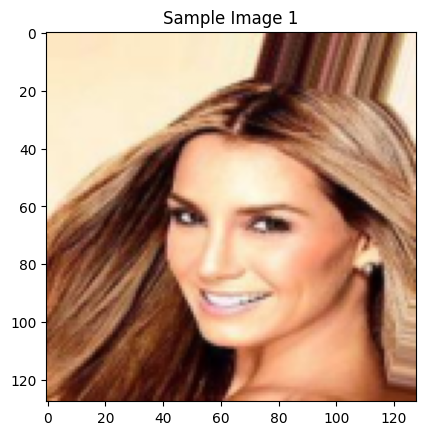

In [ ]:
import matplotlib.pyplot as plt

# converting the tensor to a numpy array and transposing the channels
# .cpu() is used since matplotlib.pyplot uses CPU and not GPU
image_np = all_images[0].cpu().permute(1, 2, 0).numpy()

# and then displaying the image with matplotlib.pyplot
plt.imshow(image_np)
plt.title("Sample Image 1")
plt.show()

## The Attributes of this Image

In [ ]:
all_attributes[0]

tensor([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1], device='cuda:0')

Function to display the attribute information in a way that's easier to understand

In [ ]:
attribute_names = ["5 o-Clock Shadow", "Arched Eyebrows", "Attractive", "Bags Under Eyes", "Bald", "Bangs", "Big Lips", "Big Nose", "Black Hair", "Blond Hair", "Blurry", "Brown Hair", "Bushy Eyebrows", "Chubby", "Double Chin", "Eyeglasses", "Goatee", "Gray Hair", "Heavy Makeup", "High Cheekbones", "Male", "Mouth Slightly Open", "Mustache", "Narrow Eyes", "No Beard", "Oval Face", "Pale Skin", "Pointy Nose", "Receding Hairline", "Rosy Cheeks", "Sideburns", "Smiling", "Straight Hair", "Wavy Hair", "Wearing Earrings", "Wearing Hat", "Wearing Lipstick", "Wearing Necklace", "Wearing Necktie", "Young"]

def display_attributes(attribute_tensor):

    # for each attribute
    for name, value in zip(attribute_names, attribute_tensor):
        # 1 -> "Yes", 0 -> "No"
        attribute_status = "Yes" if value.item() == 1 else "No"

        # displaying the attribute information
        # (the underscores are replaced with a space)
        print(f"{name.replace('_', ' ')}: {attribute_status}")

## The attributes which accurately describe the image

In [ ]:
display_attributes(all_attributes[0])

5 o-Clock Shadow: No
Arched Eyebrows: Yes
Attractive: Yes
Bags Under Eyes: No
Bald: No
Bangs: No
Big Lips: No
Big Nose: No
Black Hair: No
Blond Hair: No
Blurry: No
Brown Hair: Yes
Bushy Eyebrows: No
Chubby: No
Double Chin: No
Eyeglasses: No
Goatee: No
Gray Hair: No
Heavy Makeup: Yes
High Cheekbones: Yes
Male: No
Mouth Slightly Open: Yes
Mustache: No
Narrow Eyes: No
No Beard: Yes
Oval Face: No
Pale Skin: No
Pointy Nose: Yes
Receding Hairline: No
Rosy Cheeks: No
Sideburns: No
Smiling: Yes
Straight Hair: Yes
Wavy Hair: No
Wearing Earrings: Yes
Wearing Hat: No
Wearing Lipstick: Yes
Wearing Necklace: No
Wearing Necktie: No
Young: Yes


<br></br>
<br></br>
## Splitting the Data for training, validation, and testing

In [ ]:
from sklearn.model_selection import train_test_split

# the splits.  80% train, 10% validation, 10% test
train_size = 0.8
val_size = 0.1
test_size = 0.1

train_data, remaining_data = train_test_split(
    all_data, train_size=train_size, random_state=42)

val_data, test_data = train_test_split(
    remaining_data, test_size=test_size/(test_size + val_size), random_state=42)

# displaying the sizes of all these
print(f"Total dataset size: {len(all_data)}")
print(f"Training set size: {len(train_data)}")
print(f"Validation set size: {len(val_data)}")
print(f"Test set size: {len(test_data)}")

Total dataset size: 3000
Training set size: 2400
Validation set size: 300
Test set size: 300


In [ ]:
batch_size = 32

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

<br></br>
# **Creating the model - Convolutional Neural Network (CNN)**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Convolutional Neural Network class
class SimpleCNN(nn.Module):
    def __init__(self, num_attributes):
        super(SimpleCNN, self).__init__()

        # layers:
        # first convolutional layer
        # (applying 64 kernels, each of 3x3 size, to the input which is 3)
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)

        # second convolutional layer
        # (applying 128 kernels, each of 3x3 size, to the input which is 64)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)

        # max-pooling layer, to reduce computational complexity
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # first fully connected dense layer
        # (takes the flattened output prior, and connects it to 512 neurons)
        self.fc1 = nn.Linear(128 * 32 * 32, 512)

        # second fully connected dense layer
        # (takes the output prior, and connects it to num_attributes amount of neurons)
        self.fc2 = nn.Linear(512, num_attributes)

    # forward pass function
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 128 * 32 * 32)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


# the model
model = SimpleCNN(num_attributes = len(attribute_names))

# binary cross-entropy loss since each attribute is binary (0 or 1)
criterion = nn.BCEWithLogitsLoss()

# adam optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

Moving the model to the GPU

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

SimpleCNN(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=131072, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=40, bias=True)
)

## Validation Functions

In [ ]:
def find_optimal_threshold(outputs, targets, num_thresholds=100):

    # generating 100 (num_thresholds) thresholds with values from 0 to 1
    thresholds = np.linspace(0, 1, num_thresholds)

    f1_scores = []

    # loop for each threshold
    for threshold in thresholds:

        # converting model outputs to binary predictions using the current
        # threshold
        predictions = torch.sigmoid(outputs) > threshold

        # calculating f1 score between the actual attribute values and the
        # predictions.  And appending the result to the list
        f1 = f1_score(targets.cpu().numpy(), predictions.cpu().numpy(), average="micro")
        f1_scores.append(f1)

    # returning the optimal threshold, which is the largest f1 score
    optimal_threshold = thresholds[np.argmax(f1_scores)]
    return optimal_threshold

In [ ]:
def validation_step(model):
    # set the model to evaluation mode
    model.eval()

    total_correct = 0
    total_instances = 0
    all_predictions = []
    all_correct_vals = []

    # temporarily disable gradient computation (since this is not for training)
    with torch.no_grad():
        # loop for the batches of data in val_loader
        for images, attributes in val_loader:
            # moving images and attributes to use the GPU device
            images, attributes = images.to(device), attributes.to(device)

            # outputs_model used to make predictions based on the input images
            outputs_model = model(images)

            # finding an optimal threshold using validation set
            threshold = find_optimal_threshold(outputs_model, attributes)

            # appending the attributes and prediction results
            predictions = torch.sigmoid(outputs_model) > threshold
            total_correct += torch.sum(torch.eq(predictions, attributes)).item()
            total_instances += attributes.numel()
            all_correct_vals.append(attributes.cpu().numpy())
            all_predictions.append(predictions.cpu().numpy())

    all_correct_vals = np.concatenate(all_correct_vals)
    all_predictions = np.concatenate(all_predictions)

    # Calculate and display validation accuracy
    accuracy = total_correct / total_instances
    print(f'Validation Accuracy: {accuracy * 100:.2f}%')

    # Calculate and display validation F1 score (micro-average)
    f1 = f1_score(all_correct_vals, all_predictions, average="micro")
    print(f'Validation F1 Score: {f1 * 100:.2f}%')
    return f1*100, accuracy*100

## Training Loop

In [ ]:
import numpy as np
import torch.nn.functional as F
from sklearn.metrics import f1_score

def training_loop(model, num_epochs):

  val_accs = []
  val_f1s = []
  train_accs = []
  train_f1s = []

  # loop for num_epochs amount of times
  for epoch in range(num_epochs):
      total_correct = 0
      total_samples = 0
      total_loss = 0.0
      all_predictions = []
      all_correct_vals = []

      # for each batch of data in train_loader
      for images, attributes in train_loader:

          # moving images and attributes to use the GPU device
          images, attributes = images.to(device), attributes.to(device)

          # clearing/initializing the gradients to zero
          optimizer.zero_grad()

          # outputs_model used to make predictions based on the input images
          outputs_model = model(images)

          # calculate the loss for binary classification
          loss = criterion(outputs_model, attributes.float())

          # backpropagation used to compute the gradients of the loss
          loss.backward()

          # taking a step to update the model parameters based on the gradients computed
          optimizer.step()

          # calculate training accuracy
          predicted = torch.sigmoid(outputs_model) > 0.5
          # predicted = (torch.sigmoid(outputs_model) > 0.5).float()  # Convert logits to binary predictions
          total_correct += (predicted == attributes).sum().item()
          total_samples += attributes.numel()

          # accumulate total loss
          total_loss += loss.item() * images.size(0)
          all_correct_vals.append(attributes.cpu().numpy())
          all_predictions.append(predicted.cpu().numpy())

      # calculate training accuracy after each epoch
      all_correct_vals = np.concatenate(all_correct_vals)
      all_predictions = np.concatenate(all_predictions)
      accuracy = 100 * total_correct / total_samples
      train_f1 = 100 * f1_score(all_correct_vals, all_predictions, average="micro")
      average_loss = total_loss / len(train_loader.dataset)
      print(f"Epoch [{epoch + 1}/{num_epochs}], Training F1 Score: {train_f1:.2f}%, Training Accuracy: {accuracy:.2f}%, Average Loss: {average_loss:.4f}")

      # validation after each epoch
      val_f1, val_acc = validation_step(model)
      val_accs.append(val_acc)
      val_f1s.append(val_f1)
      train_accs.append(accuracy)
      train_f1s.append(train_f1)
      print("")
  return train_accs, train_f1s, val_accs, val_f1s

In [ ]:
train_accs, train_f1s, val_accs, val_f1s = training_loop(model, 10)

Epoch [1/10], Training F1 Score: 45.22%, Training Accuracy: 80.57%, Average Loss: 0.4466
Validation Accuracy: 78.58%
Validation F1 Score: 58.37%

Epoch [2/10], Training F1 Score: 56.52%, Training Accuracy: 83.87%, Average Loss: 0.3710
Validation Accuracy: 82.36%
Validation F1 Score: 62.59%

Epoch [3/10], Training F1 Score: 62.66%, Training Accuracy: 85.62%, Average Loss: 0.3312
Validation Accuracy: 83.67%
Validation F1 Score: 65.82%

Epoch [4/10], Training F1 Score: 67.78%, Training Accuracy: 87.23%, Average Loss: 0.2944
Validation Accuracy: 85.49%
Validation F1 Score: 68.32%

Epoch [5/10], Training F1 Score: 71.89%, Training Accuracy: 88.59%, Average Loss: 0.2622
Validation Accuracy: 85.41%
Validation F1 Score: 68.12%

Epoch [6/10], Training F1 Score: 76.22%, Training Accuracy: 90.09%, Average Loss: 0.2299
Validation Accuracy: 85.41%
Validation F1 Score: 68.43%

Epoch [7/10], Training F1 Score: 80.40%, Training Accuracy: 91.65%, Average Loss: 0.1957
Validation Accuracy: 85.51%
Validat

In [171]:
# function used to plot an accuracy graph and f1 score graph from the train and
# validation.
def plot_train_and_validation_metrics(train_accs, train_f1s, val_accs, val_f1s):
    # Accuracy scores
    plt.plot(train_accs)
    plt.plot(val_accs)
    plt.title("Accuracy score for the Training and Validation sets")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy score")
    plt.legend(["Training Scores", "Validation Scores"])
    plt.show()

    # F1 Scores
    plt.plot(train_f1s)
    plt.plot(val_f1s)
    plt.title("F1 score for the Training and Validation sets")
    plt.xlabel("Epochs")
    plt.ylabel("F1 score")
    plt.legend(["Training Scores", "Validation Scores"])
    plt.show()


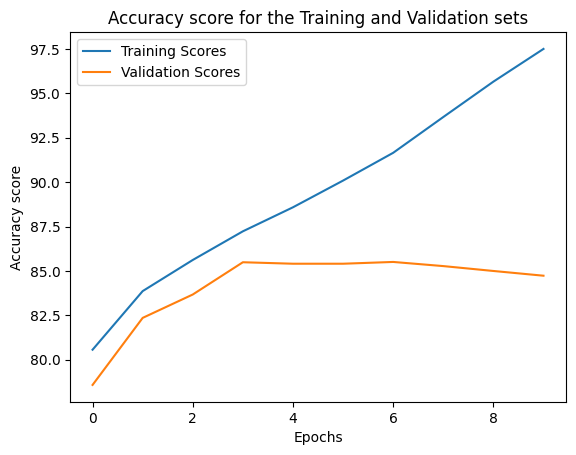

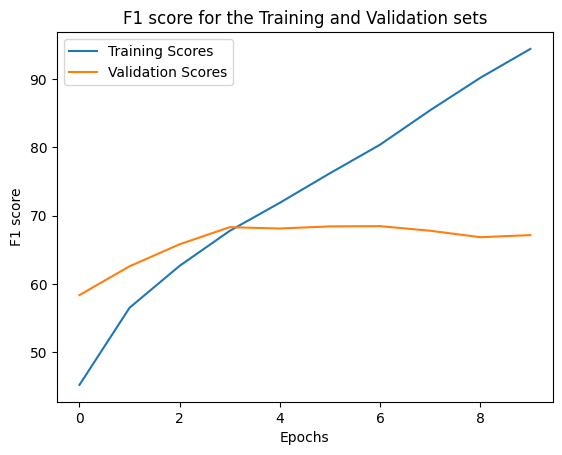

In [172]:
plot_train_and_validation_metrics(train_accs, train_f1s, val_accs, val_f1s)

## Testing

In [173]:
import numpy as np
from sklearn.metrics import f1_score

def test_step(model):
    # set the model to evaluation mode
    model.eval()

    # temporarily disable gradient computation
    with torch.no_grad():
        all_correct_vals = []
        all_predictions = []

        # loop for the batches of data in the test_loader
        for images, attributes in test_loader:
            # moving images and attributes to use the GPU device
            images, attributes = images.to(device), attributes.to(device)

            # make predictions on the test data
            outputs_model = model(images)
            predictions = torch.sigmoid(outputs_model) > 0.5

            # append the ground truth and prediction values
            all_correct_vals.append(attributes.cpu().numpy())
            all_predictions.append(predictions.cpu().numpy())

    # concatenate the results for the entire test dataset
    all_correct_vals = np.concatenate(all_correct_vals)
    all_predictions = np.concatenate(all_predictions)

    # calculate and display test accuracy
    test_accuracy = np.sum(all_correct_vals == all_predictions) / all_correct_vals.size
    print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

    # calculate and display test F1 score
    test_f1 = f1_score(all_correct_vals, all_predictions, average="micro")
    print(f'Test F1 Score: {test_f1 * 100:.2f}%')

In [174]:
test_step(model)

Test Accuracy: 85.55%
Test F1 Score: 66.54%


<br></br>
## **Trying with an adjusted Second Model**

### Adjustments here are:
- Changed learning rate from 0.001 to 0.0001

In [177]:
# the second model
model_2 = SimpleCNN(num_attributes = len(attribute_names))
model_2 = model_2.to(device)

# binary cross-entropy loss since each attribute is binary (0 or 1)
criterion = nn.BCEWithLogitsLoss()

# adam optimizer
optimizer = optim.Adam(model_2.parameters(), lr=0.0001)

In [178]:
train_accs, train_f1s, val_accs, val_f1s = training_loop(model_2, 10)

Epoch [1/10], Training F1 Score: 44.91%, Training Accuracy: 80.97%, Average Loss: 0.4305
Validation Accuracy: 79.33%
Validation F1 Score: 58.07%

Epoch [2/10], Training F1 Score: 56.46%, Training Accuracy: 84.14%, Average Loss: 0.3707
Validation Accuracy: 83.05%
Validation F1 Score: 63.17%

Epoch [3/10], Training F1 Score: 62.20%, Training Accuracy: 85.71%, Average Loss: 0.3341
Validation Accuracy: 83.95%
Validation F1 Score: 65.58%

Epoch [4/10], Training F1 Score: 66.30%, Training Accuracy: 86.98%, Average Loss: 0.3038
Validation Accuracy: 84.96%
Validation F1 Score: 66.74%

Epoch [5/10], Training F1 Score: 69.58%, Training Accuracy: 88.00%, Average Loss: 0.2799
Validation Accuracy: 85.12%
Validation F1 Score: 67.38%

Epoch [6/10], Training F1 Score: 72.43%, Training Accuracy: 88.95%, Average Loss: 0.2581
Validation Accuracy: 85.38%
Validation F1 Score: 67.91%

Epoch [7/10], Training F1 Score: 75.13%, Training Accuracy: 89.90%, Average Loss: 0.2372
Validation Accuracy: 84.48%
Validat

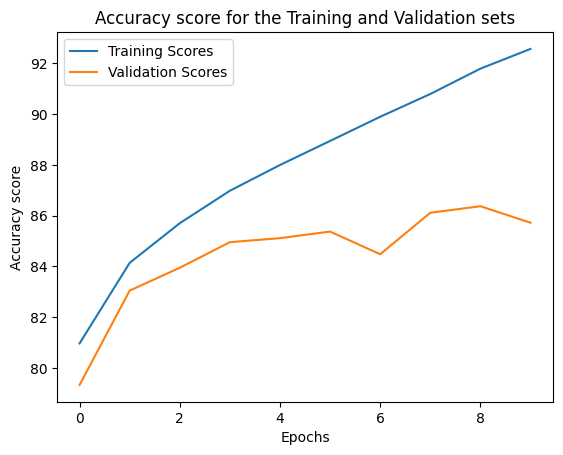

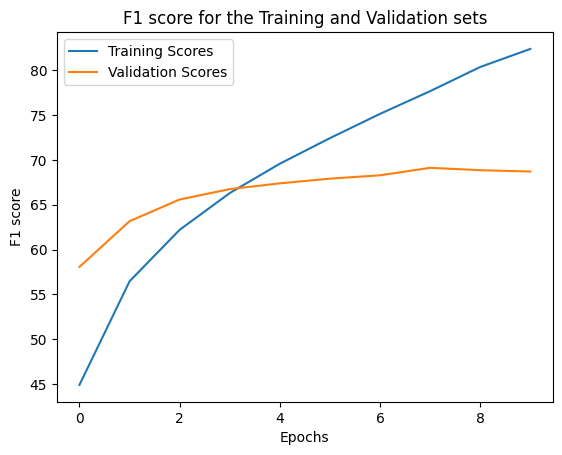

In [179]:
plot_train_and_validation_metrics(train_accs, train_f1s, val_accs, val_f1s)

In [180]:
test_step(model_2)

Test Accuracy: 86.81%
Test F1 Score: 68.54%


<br></br>
## **Trying with an adjusted Third Model**

### Adjustments here are:
- Added dropout to the model to prevent overfitting

In [181]:
# Convolutional Neural Network class version 2
# Like SimpleCNN but with dropout added
class SimpleCNNVersionTwo(nn.Module):
    def __init__(self, num_attributes):
        super(SimpleCNNVersionTwo, self).__init__()

        # layers:
        # first convolutional layer
        # (applying 64 kernels, each of 3x3 size, to the input which is 3)
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)

        # second convolutional layer
        # (applying 128 kernels, each of 3x3 size, to the input which is 64)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)

        # max-pooling layer, to reduce computational complexity
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # first fully connected dense layer
        # (takes the flattened output prior, and connects it to 512 neurons)
        self.fc1 = nn.Linear(128 * 32 * 32, 512)

        # second fully connected dense layer
        # (takes the output prior, and connects it to num_attributes amount of neurons)
        self.fc2 = nn.Linear(512, num_attributes)

        # new:  dropout added to help prevent overfitting
        self.dropout = nn.Dropout(0.5)

    # forward pass function
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 128 * 32 * 32)
        x = F.relu(self.fc1(x))

        # applying the new dropout
        x = self.dropout(x)

        x = self.fc2(x)
        return x

In [182]:
# the third model
model_3 = SimpleCNNVersionTwo(num_attributes = len(attribute_names))
model_3 = model_3.to(device)

# binary cross-entropy loss since each attribute is binary (0 or 1)
criterion = nn.BCEWithLogitsLoss()

# adam optimizer
optimizer = optim.Adam(model_3.parameters(), lr=0.001)

In [183]:
train_accs, train_f1s, val_accs, val_f1s = training_loop(model_3, 10)

Epoch [1/10], Training F1 Score: 44.28%, Training Accuracy: 79.46%, Average Loss: 0.4674
Validation Accuracy: 78.54%
Validation F1 Score: 56.86%

Epoch [2/10], Training F1 Score: 53.97%, Training Accuracy: 83.31%, Average Loss: 0.3820
Validation Accuracy: 80.60%
Validation F1 Score: 61.70%

Epoch [3/10], Training F1 Score: 59.96%, Training Accuracy: 84.81%, Average Loss: 0.3459
Validation Accuracy: 83.52%
Validation F1 Score: 64.65%

Epoch [4/10], Training F1 Score: 64.83%, Training Accuracy: 86.29%, Average Loss: 0.3145
Validation Accuracy: 85.38%
Validation F1 Score: 67.73%

Epoch [5/10], Training F1 Score: 69.10%, Training Accuracy: 87.65%, Average Loss: 0.2821
Validation Accuracy: 85.18%
Validation F1 Score: 68.12%

Epoch [6/10], Training F1 Score: 73.01%, Training Accuracy: 88.99%, Average Loss: 0.2527
Validation Accuracy: 84.60%
Validation F1 Score: 68.15%

Epoch [7/10], Training F1 Score: 77.45%, Training Accuracy: 90.56%, Average Loss: 0.2201
Validation Accuracy: 85.82%
Validat

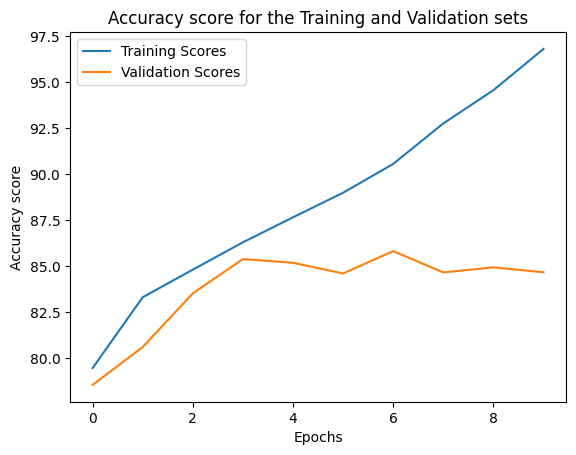

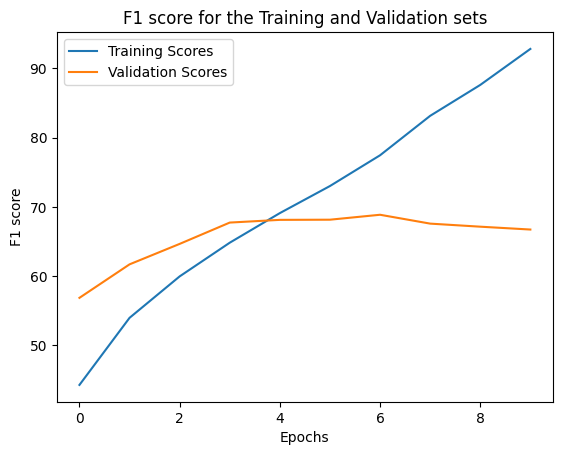

In [184]:
plot_train_and_validation_metrics(train_accs, train_f1s, val_accs, val_f1s)

In [185]:
test_step(model_3)

Test Accuracy: 85.42%
Test F1 Score: 66.36%


In [196]:
# Convert notebook to HTML
!jupyter nbconvert --to html "/content/drive/MyDrive/MachineLearningFinalProject/MachineLearning-FinalProject.ipynb"

# Move the HTML file to the content folder
!mv "/content/drive/MyDrive/MachineLearningFinalProject/MachineLearning-FinalProject.html" "/content"

# Download the HTML file
files.download("/content/MachineLearning-FinalProject.html")

[NbConvertApp] Converting notebook /content/drive/MyDrive/MachineLearningFinalProject/MachineLearning-FinalProject.ipynb to html
[NbConvertApp] Writing 1222276 bytes to /content/drive/MyDrive/MachineLearningFinalProject/MachineLearning-FinalProject.html


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>